In [238]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import chi2_contingency
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Problem 1

In [3]:
wca = pd.read_csv('Wholesale+Customers+Data.csv')
wca.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
wca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [5]:
wca.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [6]:
wca.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
wca['Spending'] = wca['Fresh']+wca['Milk']+wca['Grocery']+wca['Frozen']+wca['Detergents_Paper']+wca['Delicatessen']
wca.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Spending
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [217]:
most = wca.groupby(['Region','Channel'])['Spending'].sum()
most

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Spending, dtype: int64

In [257]:
most1 = wca.groupby(['Channel'])['Spending'].sum()
most1

Channel
Hotel     7999569
Retail    6619931
Name: Spending, dtype: int64

In [258]:
most2 = wca.groupby(['Region'])['Spending'].sum()
most2

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Spending, dtype: int64

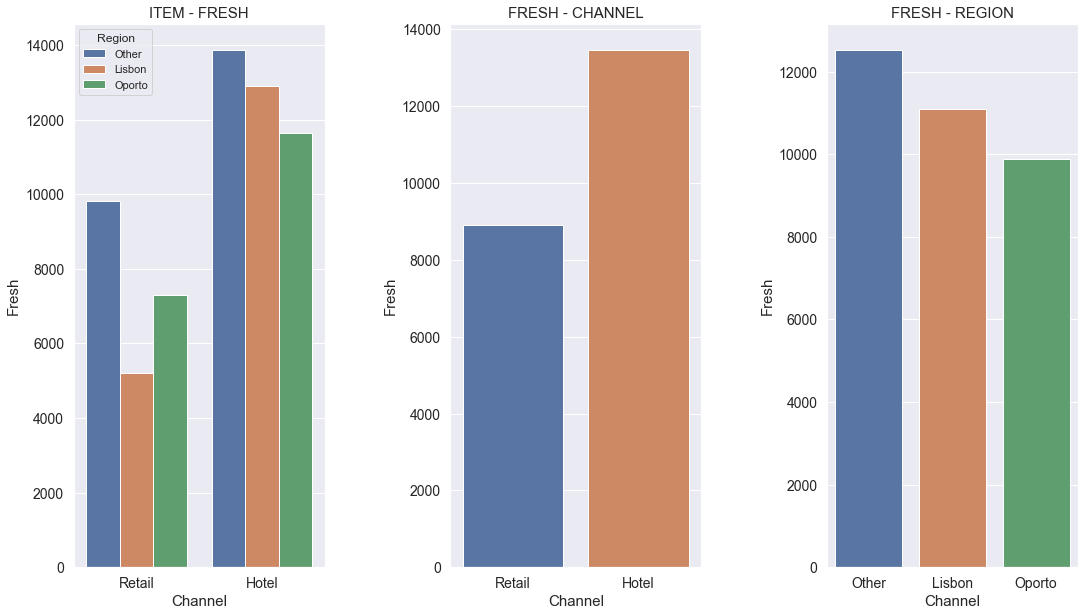

In [249]:
plt.figure(figsize=(18,10))

plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Fresh'], hue=wca['Region'],ci=None)
plt.title('ITEM - FRESH', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Fresh', fontsize=15)


plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Fresh'],ci=None)
plt.title('FRESH - CHANNEL', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Fresh', fontsize=15)



plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Fresh'],ci=None)
plt.title('FRESH - REGION', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Fresh', fontsize=15)

plt.subplots_adjust(wspace=0.5)

plt.show()

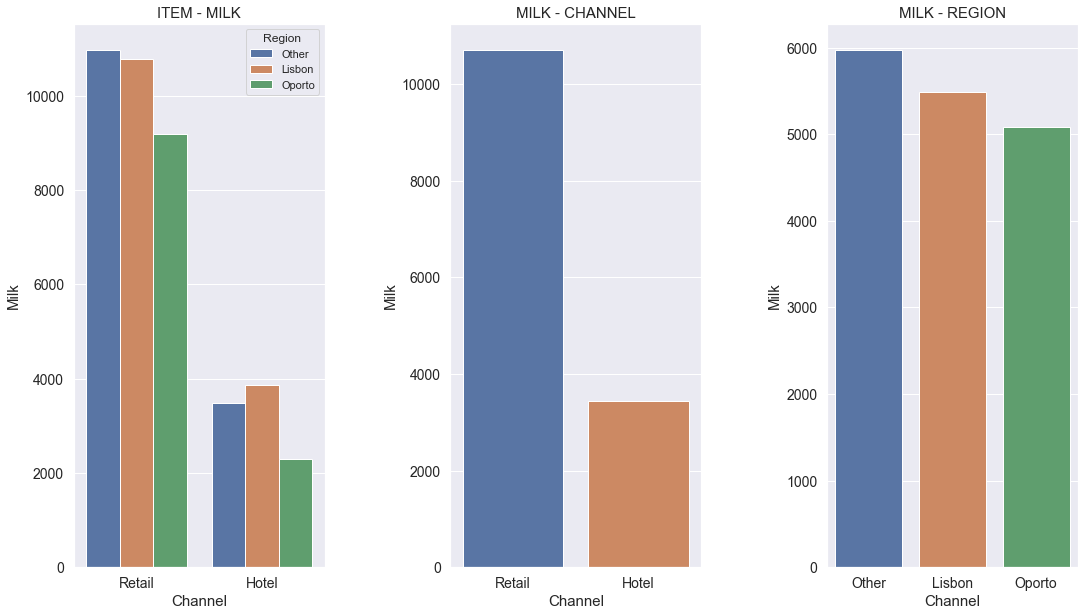

In [248]:
plt.figure(figsize=(18,10))


plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Milk'], hue=wca['Region'],ci=None)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Milk', fontsize=15)
plt.title('ITEM - MILK', fontsize=15)

plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Milk'],ci=None)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Milk', fontsize=15)
plt.title('MILK - CHANNEL', fontsize=15)

plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Milk'],ci=None)
plt.title('MILK - REGION', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Milk', fontsize=15)

plt.subplots_adjust(wspace=0.5)
plt.show()

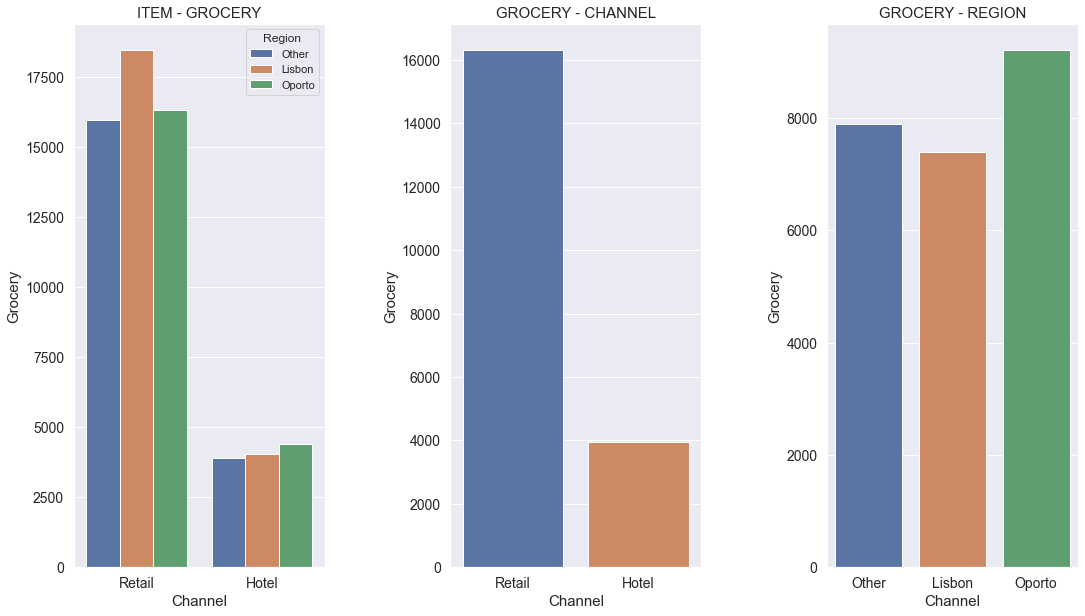

In [250]:
plt.figure(figsize=(18,10))

plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Grocery'], hue=wca['Region'],ci=None)
plt.title('ITEM - GROCERY', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Grocery', fontsize=15)


plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Grocery'],ci=None)
plt.title('GROCERY - CHANNEL', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Grocery', fontsize=15)


plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Grocery'],ci=None)
plt.title('GROCERY - REGION', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Grocery', fontsize=15)

plt.subplots_adjust(wspace=0.5)

plt.show()

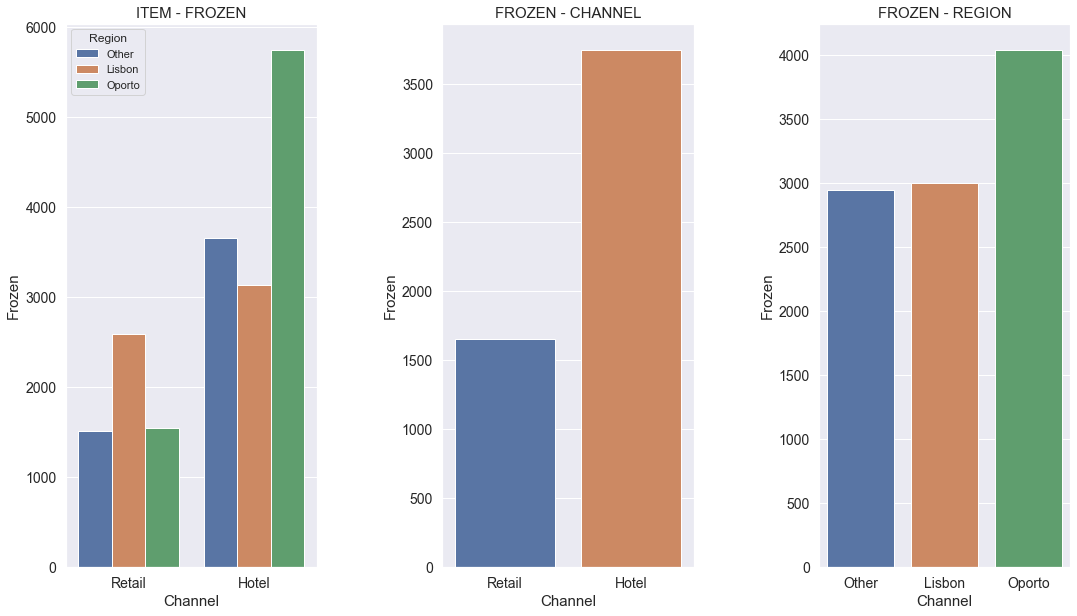

In [251]:
plt.figure(figsize=(18,10))

plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Frozen'], hue=wca['Region'],ci=None)
plt.title('ITEM - FROZEN', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Frozen', fontsize=15)


plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Frozen'],ci=None)
plt.title('FROZEN - CHANNEL', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Frozen', fontsize=15)


plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Frozen'],ci=None)
plt.title('FROZEN - REGION', fontsize=15)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Frozen', fontsize=15)

plt.subplots_adjust(wspace=0.5)

plt.show()

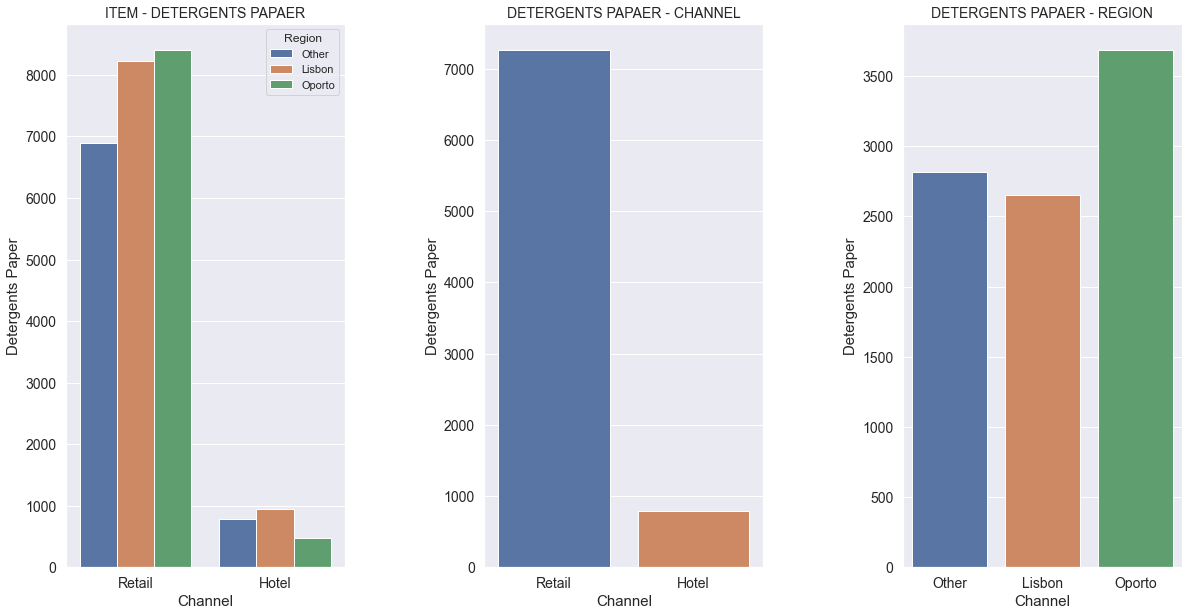

In [252]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Detergents_Paper'], hue=wca['Region'],ci=None)
plt.title('ITEM - DETERGENTS PAPAER', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Detergents Paper', fontsize=15)


plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Detergents_Paper'],ci=None)
plt.title('DETERGENTS PAPAER - CHANNEL', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Detergents Paper', fontsize=15)


plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Detergents_Paper'],ci=None)
plt.title('DETERGENTS PAPAER - REGION', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Detergents Paper', fontsize=15)

plt.subplots_adjust(wspace=0.5)

plt.show()

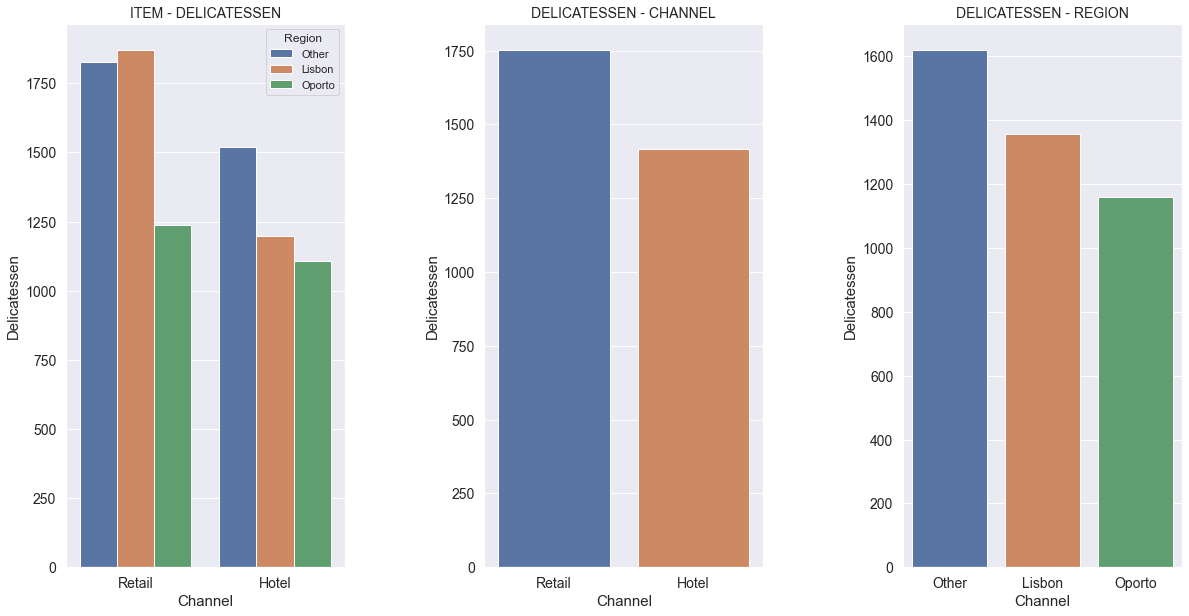

In [253]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.set(color_codes=True)
sns.barplot(wca['Channel'],wca['Delicatessen'], hue=wca['Region'],ci=None)
plt.title('ITEM - DELICATESSEN', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Delicatessen', fontsize=15)


plt.subplot(1,3,2)
sns.barplot(wca['Channel'],wca['Delicatessen'],ci=None)
plt.title('DELICATESSEN - CHANNEL', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Delicatessen', fontsize=15)


plt.subplot(1,3,3)
sns.barplot(wca['Region'],wca['Delicatessen'],ci=None)
plt.title('DELICATESSEN - REGION', fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Channel', fontsize=15)
plt.yticks(fontsize=14)
plt.ylabel('Delicatessen', fontsize=15)

plt.subplots_adjust(wspace=0.5)

plt.show()

In [55]:
wca['Fresh'].std()

12647.328865076894

In [59]:
Item = wca.iloc[:,2:9]
Item.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Other,12669,9656,7561,214,2674,1338
1,Other,7057,9810,9568,1762,3293,1776
2,Other,6353,8808,7684,2405,3516,7844
3,Other,13265,1196,4221,6404,507,1788
4,Other,22615,5410,7198,3915,1777,5185


In [254]:
Item.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [61]:
Item.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [65]:
cv_Fresh = Item['Fresh'].std()/Item['Fresh'].mean()
cv_Milk = Item['Milk'].std()/Item['Milk'].mean()
cv_Grocery = Item['Grocery'].std()/Item['Grocery'].mean()
cv_Frozen = Item['Frozen'].std()/Item['Frozen'].mean()
cv_Detergents = Item['Detergents_Paper'].std()/Item['Detergents_Paper'].mean()
cv_Deli = Item['Delicatessen'].std()/Item['Delicatessen'].mean()

In [66]:
print('The coefficient of variation for Fresh is', cv_Fresh)
print('The coefficient of variation for Milk is', cv_Milk)
print('The coefficient of variation for Grocery is', cv_Grocery)
print('The coefficient of variation for Frozen is', cv_Frozen)
print('The coefficient of variation for Detergents Paper is', cv_Detergents)
print('The coefficient of variation for Delicatessen is', cv_Deli)

The coefficient of variation for Fresh is 1.0539179237473149
The coefficient of variation for Milk is 1.2732985840065414
The coefficient of variation for Grocery is 1.1951743730016824
The coefficient of variation for Frozen is 1.5803323836352914
The coefficient of variation for Detergents Paper is 1.6546471385005155
The coefficient of variation for Delicatessen is 1.8494068981158382


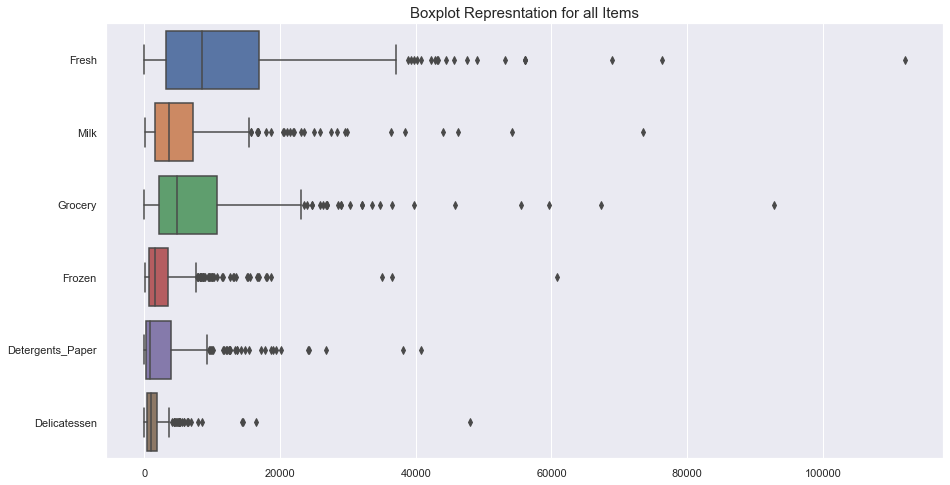

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(data=Item,orient='h')
plt.title('Boxplot Represntation for all Items',fontsize=15)
plt.show()

In [72]:
#As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”



In [73]:
#Problem 2

In [74]:
cmsu = pd.read_csv('Survey-1.csv')
cmsu.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [75]:
cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [76]:
cmsu.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [77]:
cmsu.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [109]:
G_Major = pd.crosstab(cmsu['Gender'], cmsu['Major'],margins=True)
G_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [140]:
G_Grad = pd.crosstab(cmsu['Gender'], cmsu['Grad Intention'], margins=True)
G_Grad

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [111]:
G_Emp = pd.crosstab(cmsu['Gender'], cmsu['Employment'],margins=True)
G_Emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [112]:
G_Com = pd.crosstab(cmsu['Gender'], cmsu['Computer'],margins=True)
G_Com

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [88]:
cmsu['Gender'].value_counts(ascending=True)

Male      29
Female    33
Name: Gender, dtype: int64

In [93]:
#Probality that randomly selected Student will Male
print('Probality that randomly selected Student will be Male',29/62*100)

#Probality that randomly selected Student will Female
print('Probality that randomly selected Student will be Female',33/62*100)

Probality that randomly selected Student will be Male 46.774193548387096
Probality that randomly selected Student will be Female 53.2258064516129


In [113]:
G_Major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [95]:
#Male
print('Probability of male students opted for Accounting',4/29*100)
print('Probability of male students opted for CIS',1/29*100)
print('Probability of male students opted for Economics/Finance',4/29*100)
print('Probability of male students opted for International Business',2/29*100)
print('Probability of male students opted for Management',6/29*100)
print('Probability of male students opted for Other',4/29*100)
print('Probability of male students opted for Retail/Marketing',5/29*100)
print('Probability of male students opted for Undecided',3/29*100)

Probability of male students opted for Accounting 13.793103448275861
Probability of male students opted for CIS 3.4482758620689653
Probability of male students opted for Economics/Finance 13.793103448275861
Probability of male students opted for International Business 6.896551724137931
Probability of male students opted for Management 20.689655172413794
Probability of male students opted for Other 13.793103448275861
Probability of male students opted for Retail/Marketing 17.24137931034483
Probability of male students opted for Undecided 10.344827586206897


In [97]:
#Female
print('Probability of Female students opted for Accounting',3/33*100)
print('Probability of Female students opted for CIS',3/33*100)
print('Probability of Female students opted for Economics/Finance',7/33*100)
print('Probability of Female students opted for International Business',4/33*100)
print('Probability of Female students opted for Management',4/33*100)
print('Probability of Female students opted for Other',3/33*100)
print('Probability of Female students opted for Retail/Marketing',9/33*100)
print('Probability of Female students opted for Undecided',0/33*100)

Probability of Female students opted for Accounting 9.090909090909092
Probability of Female students opted for CIS 9.090909090909092
Probability of Female students opted for Economics/Finance 21.21212121212121
Probability of Female students opted for International Business 12.121212121212121
Probability of Female students opted for Management 12.121212121212121
Probability of Female students opted for Other 9.090909090909092
Probability of Female students opted for Retail/Marketing 27.27272727272727
Probability of Female students opted for Undecided 0.0


In [141]:
G_Grad

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [99]:
#Student is a male and intends to graduate
print('The probality that a randomly chosen student is a male and intends to graduate is',17/29)

The probality that a randomly chosen student is a male and intends to graduate is 0.5862068965517241


In [115]:
G_Com

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [101]:
#Student is a female and does NOT have a laptop
print('The Probability that a randomly selected student is a female and does NOT have a laptop is',4/33*100)

The Probability that a randomly selected student is a female and does NOT have a laptop is 12.121212121212121


In [116]:
G_Emp

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [108]:
#Student is a male or has full-time employment
print('The Probability that a randomly chosen student is a male or has full-time employment',(29/62+10/62-7/62)*100)

The Probability that a randomly chosen student is a male or has full-time employment 51.61290322580645


In [255]:
#Female student is randomly chosen, she is majoring in international business or management
print('The Probability that a female student is majoring in international business or management',(4/33+4/33)*100)

The Probability that a female student is majoring in international business or management 24.242424242424242


In [154]:
G_Int = pd.crosstab(cmsu['Gender'],cmsu['Grad Intention'])
G_Int

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [155]:
G_Int = G_Gr.drop('Undecided',axis=1)

In [156]:
G_D

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [158]:
#Probability that P(Grad Int Yes) 
P1=28/40
P1

0.7

In [159]:
#Probability that P(Grad Int Yes and Female)
P2=11/20
P2

0.55

In [161]:
G_Gpa = pd.crosstab(cmsu['Gender'], cmsu['GPA'],margins=True)
G_Gpa

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [162]:
#Probability(less than 3GPA)
print('The Probability that a student scores less than 3 GPA',(17/62)*100)

The Probability that a student scores less than 3 GPA 27.419354838709676


In [256]:
G_Earn = pd.crosstab(cmsu['Gender'],cmsu['Salary'],margins=True)
G_Earn.T

Gender,Female,Male,All
Salary,,,
25.0,0,1,1
30.0,5,0,5
35.0,1,1,2
37.0,0,1,1
37.5,1,0,1
40.0,5,7,12
42.0,1,0,1
45.0,1,4,5
47.0,0,1,1


In [167]:
#Probability that male earns more than 50
print('The Probability that a male earns 50 or more',(14/29)*100)
#Probability that female earns more than 50
print('The Probability that a female earns 50 or more',(18/33)*100)

The Probability that a male earns 50 or more 48.275862068965516
The Probability that a female earns 50 or more 54.54545454545454


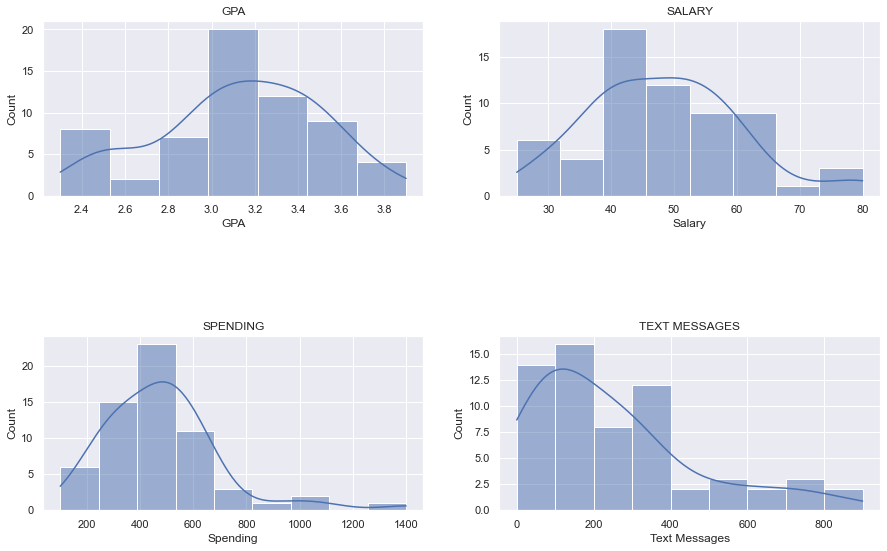

In [178]:
plt.figure(figsize=(15,9))

plt.subplot(2,2,1)
sns.histplot(cmsu['GPA'],kde=True)
plt.title('GPA')

plt.subplot(2,2,2)
sns.histplot(cmsu['Salary'],kde=True)
plt.title('SALARY')


plt.subplot(2,2,3)
sns.histplot(cmsu['Spending'],kde=True)
plt.title('SPENDING')

plt.subplot(2,2,4)
sns.histplot(cmsu['Text Messages'],kde=True)
plt.title('TEXT MESSAGES')

plt.subplots_adjust(hspace=0.8)
plt.show()

In [182]:
from scipy.stats import shapiro

In [260]:
print('For GPA:',shapiro(cmsu['GPA']))
print('For Salary:',shapiro(cmsu['Salary']))
print('For Spending:',shapiro(cmsu['Spending']))
print('For Text Messages:',shapiro(cmsu['Text Messages']))

For GPA: ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)
For Salary: ShapiroResult(statistic=0.9565857648849487, pvalue=0.028001394122838974)
For Spending: ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)
For Text Messages: ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)


In [187]:
#Problem 3

In [188]:
abc = pd.read_csv('A+&+B+shingles.csv')
abc.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [189]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [190]:
abc.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [197]:
abc['A'].mean()

0.3166666666666666

In [191]:
#H0>=0.35(moisture content is less or equal to 0.35)
#H1<0.35(moisture content is more than 0.35)

In [192]:
tstat, pval = ttest_1samp(abc['A'],0.35)

In [193]:
tstat

-1.4735046253382782

In [207]:
pval/2

0.07477633144907513

In [195]:
#pval>0.05. So,H0 is accepted for shingles A

In [204]:
tstat1, pval1 = ttest_1samp(abc['B'],0.35,nan_policy='omit')

In [205]:
tstat1

-3.1003313069986995

In [206]:
pval1/2

0.0020904774003191826

In [208]:
##pval<0.05. So,H0 is rejected for shingles B

In [209]:
#H0:mean(A)=mean(B)
#H1:mean(A)!=mean(B)

In [211]:
tstat2,pval2=ttest_ind(abc['A'],abc['B'],nan_policy='omit')

In [212]:
tstat2

1.2896282719661123

In [213]:
pval2

0.2017496571835306

In [ ]:
#pval>0.05 S0, H0 is accepted.